<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 도미 데이터 준비
# http://blt.ly/bream_list
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

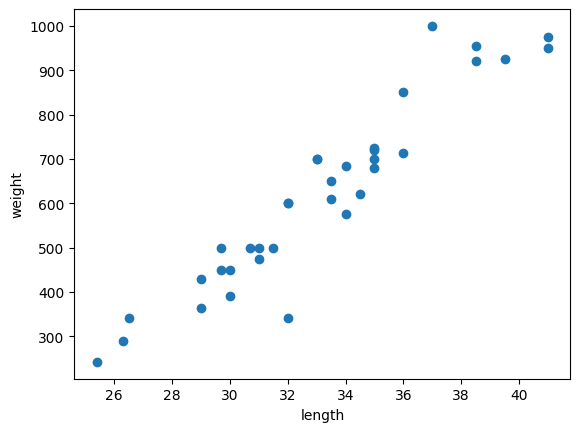

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [3]:
# 빙어 데이터 준비
# http://blt.ly/smelt_list
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

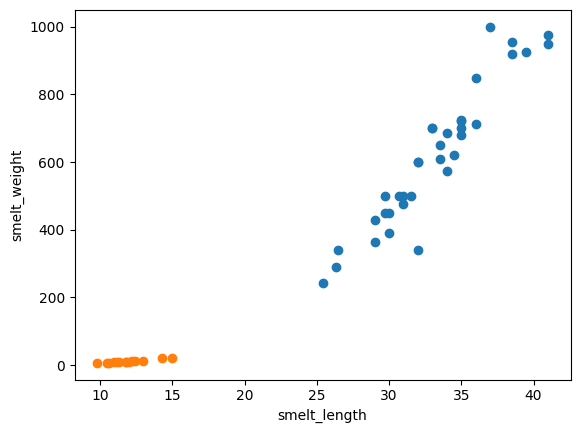

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("smelt_length")
plt.ylabel("smelt_weight")
plt.show()

In [5]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight



# 사이킷런을 사용하려면 이 데이터를 세로방향으로 늘어뜨린 2차원 리스트 만들어야함
# [[25.4 242.0],
# [26.3 290.0],
# [24.5 284.0],
#     ...
# [15.0 19.9]]



In [6]:
# 세로방향으로 늘어뜨린 2차원 리스트로 만들기
fish_data = [[l, w] for l, w in zip(length, weight)]


In [7]:
# 정답 데이터 만들기
# 도미가 35개, 빙어가 14개
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [8]:
# 사이킷런 패키지의 KNeighmorsClassifier 사용
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 주어진 데이터로 학습
kn.fit(fish_data, fish_target)

# 정답률 확인
kn.score(fish_data, fish_target)

1.0

In [9]:
# 모델 예측
kn.predict([[15, 20]])

array([0])

In [10]:
# numpy 사용해서 훈련세트와 테스트세트 분리하기
import numpy as np

# 기존 list를 numpy array로 만들기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 실습을 위한 랜덤 시드
np.random.seed(42)
# 0 ~ N-1개 까지 1씩 증하가는 배열 획득
index = np.arange(49)
# 배열을 무작위로 섞음 -> 랜덤 인덱스값 완성
np.random.shuffle(index)

# 훈련 세트
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 테스트 세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

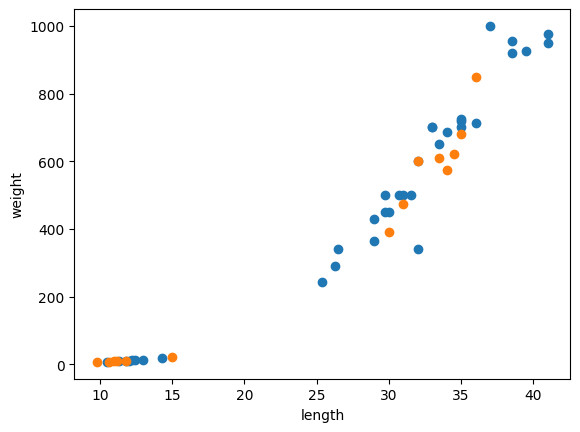

In [11]:
# 훈련 세트와 테스트 세트 확인
# 파란색 : 훈련세트
# 주황색 : 테스트 세트
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
# 섞어서 만든 훈련, 정답 데이터로 학습
kn = kn.fit(train_input, train_target)

# 테스트
kn.score(test_input, test_target)

1.0

In [13]:
# http://bit.ly/bream_smelt
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [14]:
# 데이터 전처리
import numpy as np
# 아래 코드와 같은 역할, 리스트 두개를 합쳐서 세로로 늘어뜨린 2차원 배열 만들기
fish_data = np.column_stack((fish_length, fish_weight))
# length = bream_length + smelt_length
# weight = bream_weight + smelt_weight
# fish_data = [[l, w] for l, w in zip(length, weight)]

# 첫번째 차원을 따라 배열을 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [15]:
# 사이킷런으로 훈련세트 / 테스트 세트 나누기
from sklearn.model_selection import train_test_split
# stratify : 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# 아래와 같은 결과
#-------------------------------------------
# 실습을 위한 랜덤 시드
# np.random.seed(42)
# 0 ~ N-1개 까지 1씩 증하가는 배열 획득
# index = np.arange(49)
# 배열을 무작위로 섞음 -> 랜덤 인덱스값 완성
# np.random.shuffle(index)

# 훈련 세트
# train_input = input_arr[index[:35]]
# train_target = target_arr[index[:35]]

# 테스트 세트
# test_input = input_arr[index[35:]]
# test_target = target_arr[index[35:]]

In [16]:
# 다시 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# 문제점 발생
print(kn.predict([[25, 150]]))
# 데이터는 도미인데 빙어로 분류

[0.]


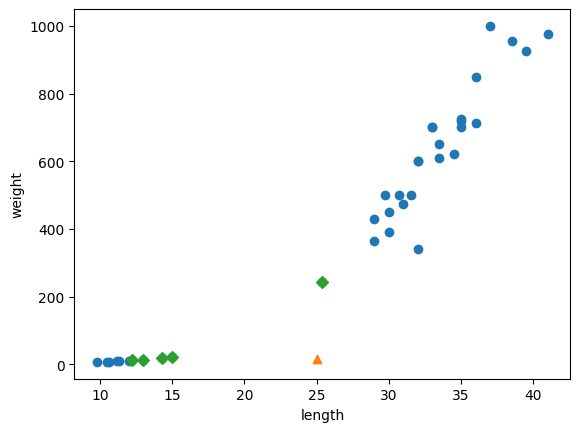

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [19]:
# 산점도 그려보기
import matplotlib.pyplot as plt
distances, indexes = kn.kneighbors([[25, 150]]) # 주어진 샘플에서 가장 가까운 이웃을 찾아줌
# indexes : 이웃
#distances : 거리

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 15, marker="^") # marker 매개변수는 모양을 지정함
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(distances)

# 주어진 데이터는 분명 도미지만, 가까운걸로 따지면 빙어에 가깝다고 판단한 것.
# x축과 Y죽의 거리 비율이 다름

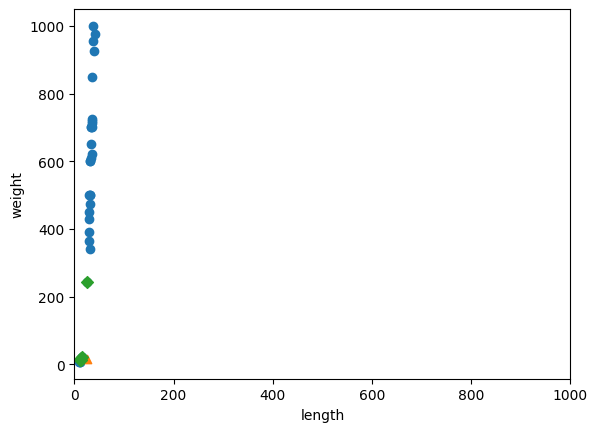

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 15, marker="^") # marker 매개변수는 모양을 지정함
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0, 1000) # x축 범위를 0~1000으로 맞춤
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 거리 기반 알고리즘 일 때 이런 스케일 문제는 자주 발생함
# 거리 기반 알고리즘은 샘플 간 거리에 영향을 많이 받으므로 특성값을 일정한 기준으로 통일해줘야함 -> 데이터 전처리라고 부름